## This is a quick exploratory data analysis about monthly sales in ebid, it is an auction sales dataset.

#### The origin of the data is the [Nashville public data](https://data.nashville.gov/Business-Development-Housing/eBid-Monthly-Sales/n54t-t7gg)

by: [Renato](https://github.com/RBarroco)


In [142]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
import pandas as pd
from sodapy import Socrata
#Public Record
client = Socrata("data.nashville.gov", None)

results = client.get("n54t-t7gg", limit=50000)

results_df = pd.DataFrame.from_records(results)

In [7]:
results_df

,auction_title,auction_id,department,close_date,winning_bid,cc_fee,fee_percent,auction_fee_subtotal,auction_fee_total,pay_status,...,inventory_id,receipt_number,cap,expenses,net_sales,fund,business_unit,vtr_number,asset,decal_vehicle_id
0,Dell Laptop w/Bag,79519,ITS,2013-11-26T00:00:00.000,78.51,1.81,0.23,18.05,18.05,Successful,...,74576,3603198592,3000.00,0.00,60.45,General Fund,0,NaN,NaN,NaN
1,21 Dell Optiplex 760 Computers,79530,ITS,2013-11-26T00:00:00.000,451.51,10.38,0.23,103.84,103.84,Successful,...,"75160, 75144, 75143, 75165, 75149, 75167, 7514...",3604173051,3000.00,0.00,347.66,General Fund,0,NaN,NaN,NaN
2,"4 Asanti 24"" Chrome Rims",79539,DRUG TASK FORCE,2013-11-27T00:00:00.000,2000.00,0.00,0.23,460.00,460.00,Successful,...,TF-311-057,Cashiers Check,3000.00,0.00,1540.00,Enterprise,0,NaN,NaN,NaN
3,10Kt Yellow Gold Rope Chain,79577,DRUG TASK FORCE,2013-12-04T00:00:00.000,815.00,0.00,0.23,187.45,187.45,Successful,...,TF-310-007A,Money Order,3000.00,0.00,627.55,Enterprise,0,NaN,NaN,NaN
4,Men's Diamond Watch,79589,DRUG TASK FORCE,2013-12-11T00:00:00.000,460.00,10.58,0.23,105.80,105.80,Successful,...,TF-310-023,3603880864,3000.00,0.00,354.20,Enterprise,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41143,HP Printer,122719,ITS,2020-08-19T00:00:00.000,2.00,0.05,23%,0.46,0.46,Successful,...,138844,3788159110,3000.00,NaN,1.54,NaN,0,NaN,NaN,NaN
41144,21 Speed Bicycle,122720,POLICE VEHICLE IMPOUND,2020-08-20T00:00:00.000,62.00,1.43,23%,14.26,14.26,Successful,...,IM180024,3787758282,3000.00,NaN,47.74,NaN,0,NaN,840864,NaN
41145,"20"" Dell Monitor",122721,POLICE DEPARTMENT,2020-08-20T00:00:00.000,17.86,0.41,23%,4.11,4.11,Successful,...,139292,3787684024,3000.00,NaN,13.75,NaN,0,NaN,NaN,NaN
41146,Bookshelf,122722,JUVENILE COURT,2020-08-20T00:00:00.000,13.00,0.30,23%,2.99,2.99,Successful,...,139286,3787681500,3000.00,NaN,10.01,NaN,0,NaN,NaN,NaN


In [37]:
df_res = results_df.copy()

In [38]:
df_res.describe()

,auction_title,auction_id,department,close_date,winning_bid,cc_fee,fee_percent,auction_fee_subtotal,auction_fee_total,pay_status,...,inventory_id,receipt_number,cap,expenses,net_sales,fund,business_unit,vtr_number,asset,decal_vehicle_id
count,41146,41146,41146,41146,41146,36949,41146,41146,41146,41146,...,38246,41146,41146,15888,41140,29223,41146,676,3398,2764
unique,12523,40359,104,1241,5899,1384,5,3789,3699,2,...,37479,32692,5,55,5703,8,1,664,3252,2710
top,Dell Optiplex Computer,113624,ITS,2019-03-21T00:00:00.000,1.00,0.00,23%,0.23,0.23,Successful,...,FSBS0659,Money Order,3000.00,0.00,0.77,Enterprise,0,938697,31740201.51,29 5390
freq,2209,2,6019,110,1993,3071,29367,2389,2389,40639,...,3,4011,35653,13128,2385,14335,41146,3,32,2


In [39]:
df_res.count()

auction_title           41146
auction_id              41146
department              41146
close_date              41146
winning_bid             41146
cc_fee                  36949
fee_percent             41146
auction_fee_subtotal    41146
auction_fee_total       41146
pay_status              41146
paid_date               41146
inventory_id            38246
receipt_number          41146
cap                     41146
expenses                15888
net_sales               41140
fund                    29223
business_unit           41146
vtr_number                676
asset                    3398
decal_vehicle_id         2764
dtype: int64

In [116]:
df_res['Date'] = pd.to_datetime(df_res['close_date'])
df_res['day'] = df_res['Date'].dt.day
df_res['month'] = df_res['Date'].dt.month
df_res['year'] = df_res['Date'].dt.year

In [118]:
df_cons = df_res[['auction_title', 'auction_id', 'net_sales', 'Date', 'day','month', 'year']]
df_cons

,auction_title,auction_id,net_sales,Date,day,month,year
0,Dell Laptop w/Bag,79519,60.45,2013-11-26,26.0,11.0,2013.0
1,21 Dell Optiplex 760 Computers,79530,347.66,2013-11-26,26.0,11.0,2013.0
2,"4 Asanti 24"" Chrome Rims",79539,1540.00,2013-11-27,27.0,11.0,2013.0
3,10Kt Yellow Gold Rope Chain,79577,627.55,2013-12-04,4.0,12.0,2013.0
4,Men's Diamond Watch,79589,354.20,2013-12-11,11.0,12.0,2013.0
...,...,...,...,...,...,...,...
41143,HP Printer,122719,1.54,2020-08-19,19.0,8.0,2020.0
41144,21 Speed Bicycle,122720,47.74,2020-08-20,20.0,8.0,2020.0
41145,"20"" Dell Monitor",122721,13.75,2020-08-20,20.0,8.0,2020.0
41146,Bookshelf,122722,10.01,2020-08-20,20.0,8.0,2020.0


In [119]:
df_cons.dtypes

auction_title            object
auction_id               object
net_sales                object
Date             datetime64[ns]
day                     float64
month                   float64
year                    float64
dtype: object

In [120]:
df_cons.count()

auction_title    41146
auction_id       41146
net_sales        41140
Date             41146
day              41146
month            41146
year             41146
dtype: int64

In [121]:
df_cons.isna().sum()

auction_title    2
auction_id       2
net_sales        8
Date             2
day              2
month            2
year             2
dtype: int64

In [122]:
df_cons.dropna(inplace=True)

<ipython-input-122-fda026b875be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cons.dropna(inplace=True)


In [123]:
df_cons = df_cons.astype({"auction_id": int, "net_sales": float, "day": int, "month": int, "year": int})
df_cons

,auction_title,auction_id,net_sales,Date,day,month,year
0,Dell Laptop w/Bag,79519,60.45,2013-11-26,26,11,2013
1,21 Dell Optiplex 760 Computers,79530,347.66,2013-11-26,26,11,2013
2,"4 Asanti 24"" Chrome Rims",79539,1540.00,2013-11-27,27,11,2013
3,10Kt Yellow Gold Rope Chain,79577,627.55,2013-12-04,4,12,2013
4,Men's Diamond Watch,79589,354.20,2013-12-11,11,12,2013
...,...,...,...,...,...,...,...
41143,HP Printer,122719,1.54,2020-08-19,19,8,2020
41144,21 Speed Bicycle,122720,47.74,2020-08-20,20,8,2020
41145,"20"" Dell Monitor",122721,13.75,2020-08-20,20,8,2020
41146,Bookshelf,122722,10.01,2020-08-20,20,8,2020


In [124]:
df_cons.dtypes

auction_title            object
auction_id                int32
net_sales               float64
Date             datetime64[ns]
day                       int32
month                     int32
year                      int32
dtype: object

In [125]:
df_cons_grouped = df_cons.groupby(by=['year', 'month'])['net_sales'].sum()
df_cons_grouped

year  month
2013  11         1948.11
      12         3372.40
2014  1        117976.53
      2        131144.99
      3         89116.78
                 ...    
2020  1         77612.78
      2         84644.82
      3         57755.93
      7         34798.56
      8        148541.03
Name: net_sales, Length: 79, dtype: float64

In [138]:
df_cons = df_cons.set_index('Date')
df_cons.head(3)

,auction_title,auction_id,net_sales,day,month,year
Date,,,,,,
2013-11-26,Dell Laptop w/Bag,79519,60.45,26,11,2013
2013-11-26,21 Dell Optiplex 760 Computers,79530,347.66,26,11,2013
2013-11-27,"4 Asanti 24"" Chrome Rims",79539,1540.00,27,11,2013


In [139]:
df_cons.index

DatetimeIndex(['2013-11-26', '2013-11-26', '2013-11-27', '2013-12-04',
               '2013-12-11', '2013-12-02', '2013-12-05', '2013-12-04',
               '2013-12-04', '2013-12-05',
               ...
               '2020-08-18', '2020-08-19', '2020-08-19', '2020-08-19',
               '2020-08-19', '2020-08-19', '2020-08-20', '2020-08-20',
               '2020-08-20', '2020-08-20'],
              dtype='datetime64[ns]', name='Date', length=41140, freq=None)

In [140]:
df_cons.loc['2013-11-26']

,auction_title,auction_id,net_sales,day,month,year
Date,,,,,,
2013-11-26,Dell Laptop w/Bag,79519,60.45,26,11,2013
2013-11-26,21 Dell Optiplex 760 Computers,79530,347.66,26,11,2013


In [147]:
df_grouped_by_day = df_cons.groupby(['Date'])['net_sales'].sum()
df_grouped_by_day_cumsum = df_grouped_by_day.cumsum()

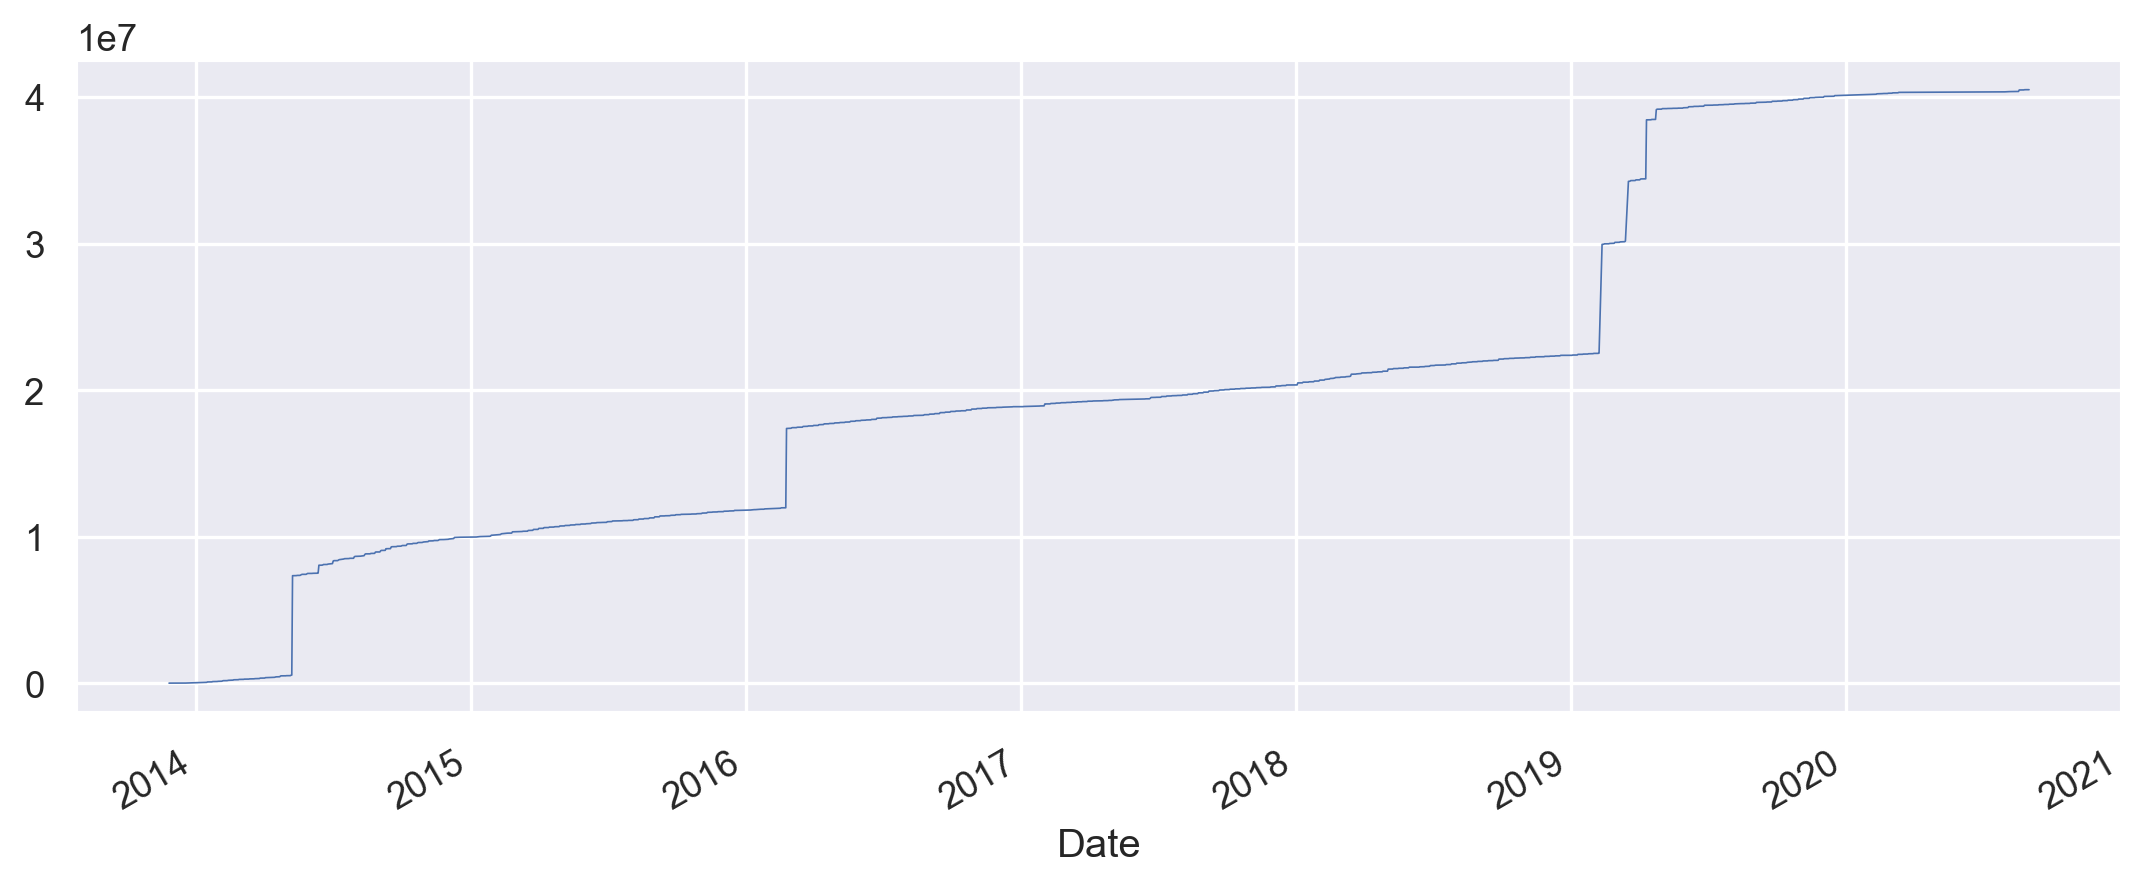

In [148]:
sns.set(rc={'figure.figsize':(11, 4)})
df_grouped_by_day_cumsum.plot(linewidth=0.5);

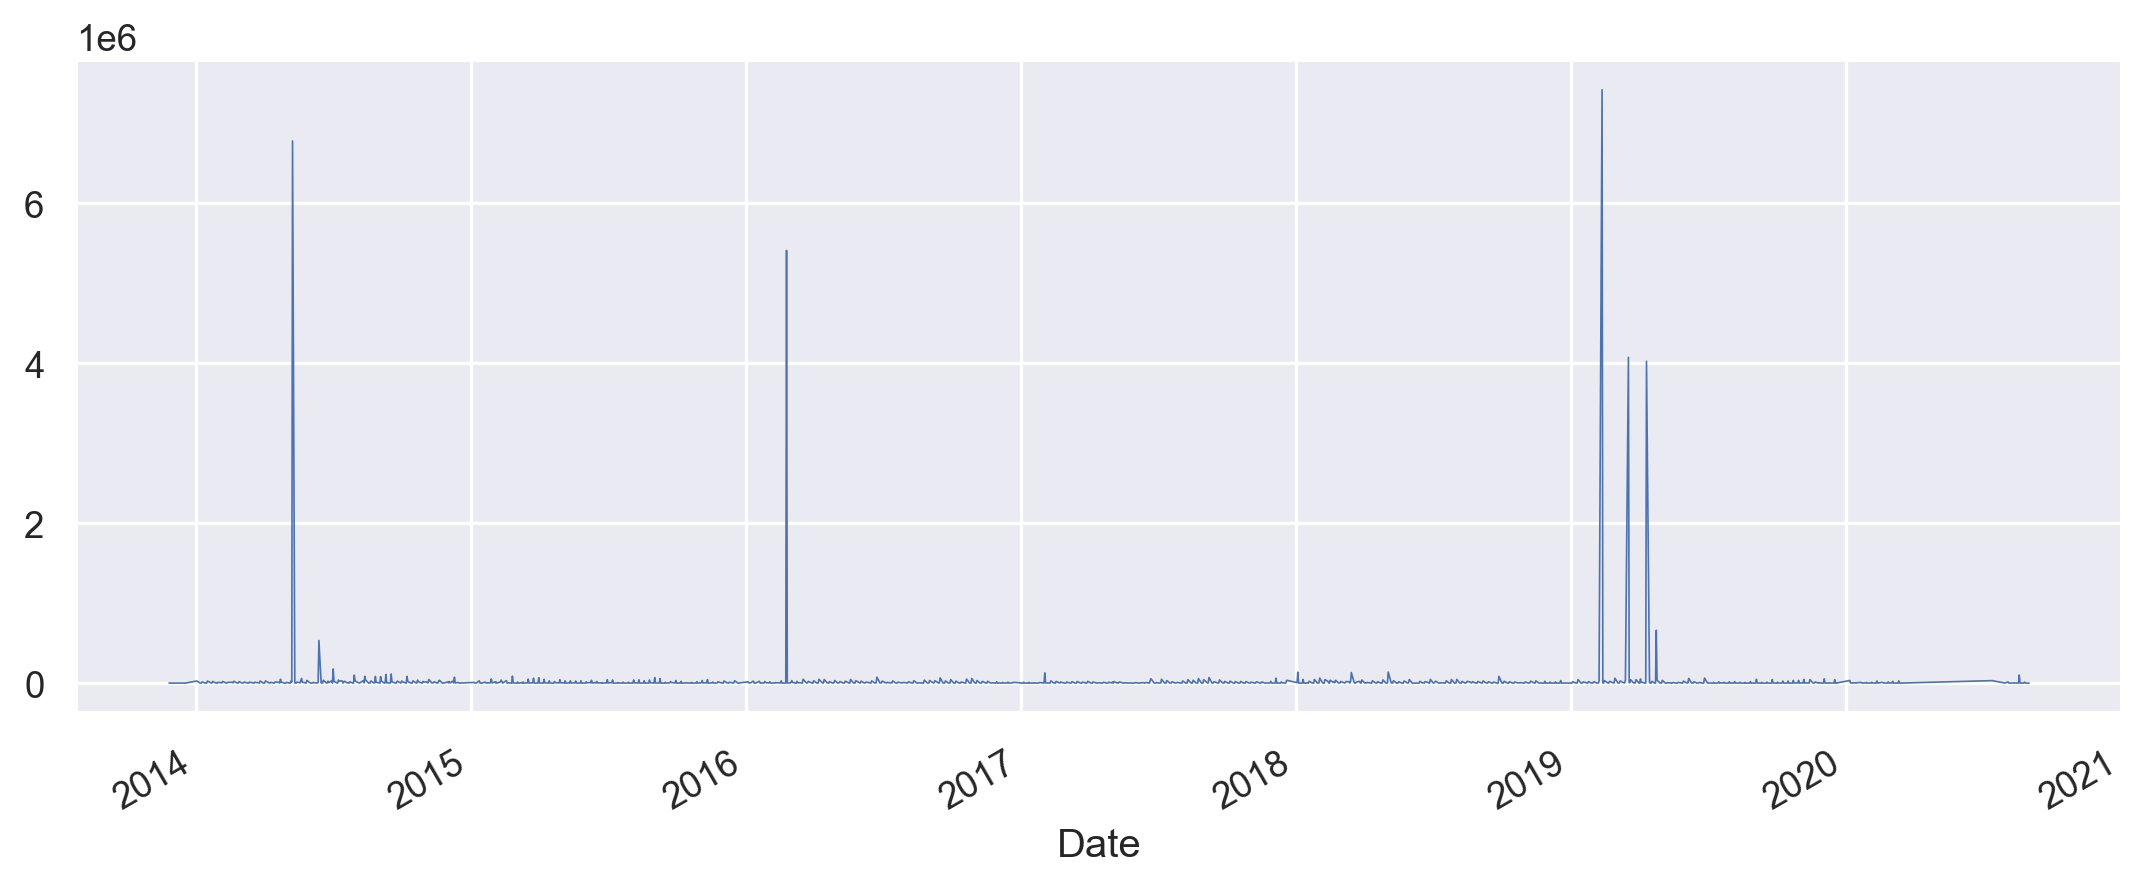

In [149]:
sns.set(rc={'figure.figsize':(11, 4)})
df_grouped_by_day.plot(linewidth=0.5);

#### Here we can see it is worth to check what happened in 2019.

In [156]:
df_cons_2019 = df_cons.loc['01-01-2019': '12-12-2019']
df_cons_2019

,auction_title,auction_id,net_sales,day,month,year
Date,,,,,,
2019-03-06,Chair,113303,0.77,6,3,2019
2019-03-06,Desk,113304,16.16,6,3,2019
2019-01-14,7 Child Chairs,112063,6.26,14,1,2019
2019-01-14,5 Child Chairs,112064,4.72,14,1,2019
2019-01-14,Table,112065,2.32,14,1,2019
...,...,...,...,...,...,...
2019-12-10,3 Keyboards,119905,3.08,10,12,2019
2019-12-11,Mega Phone,119957,63.14,11,12,2019
2019-12-12,2 Tables,119968,1.54,12,12,2019


In [160]:
df_cons_2019_sorted = df_cons_2019['net_sales'].sort_values(ascending=False)

In [162]:
df_cons_2019_sorted.head(10)

Date
2019-02-11    7420000.00
2019-03-18    4069300.00
2019-04-11    3970000.00
2019-04-24     659600.00
2019-04-03      51815.00
2019-06-06      43001.01
2019-06-27      33301.00
2019-02-28      32600.00
2019-11-06      24150.00
2019-01-10      22100.00
Name: net_sales, dtype: float64

In [177]:
df_cons_2019.loc['2019-02-11'].head(10)

,auction_title,auction_id,net_sales,day,month,year
Date,,,,,,
2019-02-11,6 Chairs,112681,46.20,11,2,2019
2019-02-11,Shop Vac,112694,20.79,11,2,2019
2019-02-11,2 Chafers,112745,26.18,11,2,2019
2019-02-11,"3800 Charlotte Ave, Nashville, TN 37209",111800,7420000.00,11,2,2019
2019-02-11,2 Chafers,112746,24.64,11,2,2019
2019-02-11,2 Chafers,112747,29.34,11,2,2019
2019-02-11,Chair,112749,3.86,11,2,2019
2019-02-11,Push Mower Motor,112750,12.32,11,2,2019
2019-02-11,21 Speed Bicycle,112751,24.64,11,2,2019


In [178]:
df_cons_2019.loc['2019-03-18'].sort_values(by=['net_sales'], ascending=False).head(10)

,auction_title,auction_id,net_sales,day,month,year
Date,,,,,,
2019-03-18,"1015 Davidson Drive, Nashville, TN 37209",113453,4069300.00,18,3,2019
2019-03-18,Assorted Emergency Equipment - EMERGENCY PROVI...,113616,404.25,18,3,2019
2019-03-18,Assorted Emergency Equipment - EMERGENCY PROVI...,113616,404.25,18,3,2019
2019-03-18,Assorted Emergency Equipment - EMERGENCY PROVI...,113619,257.69,18,3,2019
2019-03-18,Assorted Emergency Equipment - EMERGENCY PROVI...,113619,257.69,18,3,2019
2019-03-18,2 Pizza Servers,113611,164.40,18,3,2019
2019-03-18,2 Pizza Servers,113611,164.40,18,3,2019
2019-03-18,Deli Slicer,113606,157.08,18,3,2019
2019-03-18,Deli Slicer,113606,157.08,18,3,2019


In [179]:
df_cons_2019.loc['2019-04-11'].sort_values(by=['net_sales'], ascending=False).head(10)

,auction_title,auction_id,net_sales,day,month,year
Date,,,,,,
2019-04-11,"2025 Richard Jones Rd., Nashville, TN 37215",114342,3970000.00,11,4,2019
2019-04-11,2007 Takeuchi TL150 Track Loader,114375,19755.00,11,4,2019
2019-04-11,2005 Ford F-750,114361,8547.00,11,4,2019
2019-04-11,2003 New Holland TS100 Tractor,114359,5467.00,11,4,2019
2019-04-11,2018 Ford Fusion Hybrid,114356,5428.50,11,4,2019
2019-04-11,2003 Chevrolet Blazer,114366,5216.75,11,4,2019
2019-04-11,2007 Chevrolet 1500,114368,5005.01,11,4,2019
2019-04-11,2007 Chevrolet 1500,114373,2829.75,11,4,2019
2019-04-11,2011 Chevrolet Impala,114371,704.55,11,4,2019


In [180]:
df_cons_2019.loc['2019-04-24'].sort_values(by=['net_sales'], ascending=False).head(10)

,auction_title,auction_id,net_sales,day,month,year
Date,,,,,,
2019-04-24,"3125 Ironwood Drive. Nashville, TN 37214",114478,659600.00,24,4,2019
2019-04-24,3 Copiers w/ Sorters,114637,123.97,24,4,2019
2019-04-24,Dell Optiplex Computer,114618,50.07,24,4,2019
2019-04-24,Dell Optiplex Computer,114617,50.05,24,4,2019
2019-04-24,Dell Optiplex Computer,114619,48.53,24,4,2019
2019-04-24,Dell Optiplex Computer,114653,46.98,24,4,2019
2019-04-24,Dell Optiplex Computer,114652,46.98,24,4,2019
2019-04-24,Dell Optiplex Computer,114615,43.12,24,4,2019
2019-04-24,Dell Optiplex Computer,114616,42.36,24,4,2019


##### The discrepancies that we have found in the dataset in 2019 was because of some Real Estate auctions.

In [187]:
df_cons_sorted_total = df_cons.sort_values(by=['net_sales'], ascending=False).head(40)
df_cons_sorted_total

,auction_title,auction_id,net_sales,day,month,year
Date,,,,,,
2019-02-11,"3800 Charlotte Ave, Nashville, TN 37209",111800,7420000.00,11,2,2019
2014-05-09,Commercial Building & Land - 222 3rd Avenue No...,82027,6780200.00,9,5,2014
2016-02-24,"349 21st Avenue North, Nashville, TN 37203",92549,5403731.00,24,2,2016
2019-03-18,"1015 Davidson Drive, Nashville, TN 37209",113453,4069300.00,18,3,2019
2019-04-11,"2025 Richard Jones Rd., Nashville, TN 37215",114342,3970000.00,11,4,2019
2019-04-24,"3125 Ironwood Drive. Nashville, TN 37214",114478,659600.00,24,4,2019
2014-06-13,Vacant Industrial Restrictive Land - 206 Madis...,82621,291000.00,13,6,2014
2014-06-13,Vacant Industrial Restrictive Land - 200 Madis...,82620,242500.00,13,6,2014
2014-07-02,"Vacant Commercial Land - 1220 Martin Street, N...",82930,176999.01,2,7,2014


In [195]:
df_cons_new = df_cons.copy()
df_cons_new

,auction_title,auction_id,net_sales,day,month,year
Date,,,,,,
2013-11-26,Dell Laptop w/Bag,79519,60.45,26,11,2013
2013-11-26,21 Dell Optiplex 760 Computers,79530,347.66,26,11,2013
2013-11-27,"4 Asanti 24"" Chrome Rims",79539,1540.00,27,11,2013
2013-12-04,10Kt Yellow Gold Rope Chain,79577,627.55,4,12,2013
2013-12-11,Men's Diamond Watch,79589,354.20,11,12,2013
...,...,...,...,...,...,...
2020-08-19,HP Printer,122719,1.54,19,8,2020
2020-08-20,21 Speed Bicycle,122720,47.74,20,8,2020
2020-08-20,"20"" Dell Monitor",122721,13.75,20,8,2020


#### Adventure to create categories from strings to the most expensive items

In [292]:
df_cons_new.loc[df_cons_new['auction_title'].str.contains('Truck'), 'auction_title'] = 'Motor'
df_cons_new.loc[df_cons_new['auction_title'].str.contains('Ford'), 'auction_title'] = 'Motor'
df_cons_new.loc[df_cons_new['auction_title'].str.contains('Chevrolet'), 'auction_title'] = 'Motor'
df_cons_new.loc[df_cons_new['auction_title'].str.contains('Dodge'), 'auction_title'] = 'Motor'
df_cons_new.loc[df_cons_new['auction_title'].str.contains('Trailer'), 'auction_title'] = 'Motor'
df_cons_new.loc[df_cons_new['auction_title'].str.contains('Avenue'), 'auction_title'] = 'Property'
df_cons_new.loc[df_cons_new['auction_title'].str.contains('Land'), 'auction_title'] = 'Property'
df_cons_new.loc[df_cons_new['auction_title'].str.contains('Nashville, TN'), 'auction_title'] = 'Property'
df_cons_new.loc[df_cons_new['auction_title'].str.contains('Rd.'), 'auction_title'] = 'Property'
df_cons_new.loc[df_cons_new['auction_title'].str.contains('Drive.'), 'auction_title'] = 'Property'


In [296]:
df_cons_motor = df_cons_new[df_cons_new['auction_title']=='Motor']
df_cons_motor

,auction_title,auction_id,net_sales,day,month,year
Date,,,,,,
2014-01-02,Motor,79976,7007.00,2,1,2014
2014-01-02,Motor,79977,1636.25,2,1,2014
2014-01-02,Motor,79979,6930.00,2,1,2014
2014-01-02,Motor,79980,2021.25,2,1,2014
2014-01-09,Motor,80052,895.25,9,1,2014
...,...,...,...,...,...,...
2020-08-03,Motor,122400,1948.10,3,8,2020
2020-08-03,Motor,122401,100.95,3,8,2020
2020-08-03,Motor,122402,2829.75,3,8,2020


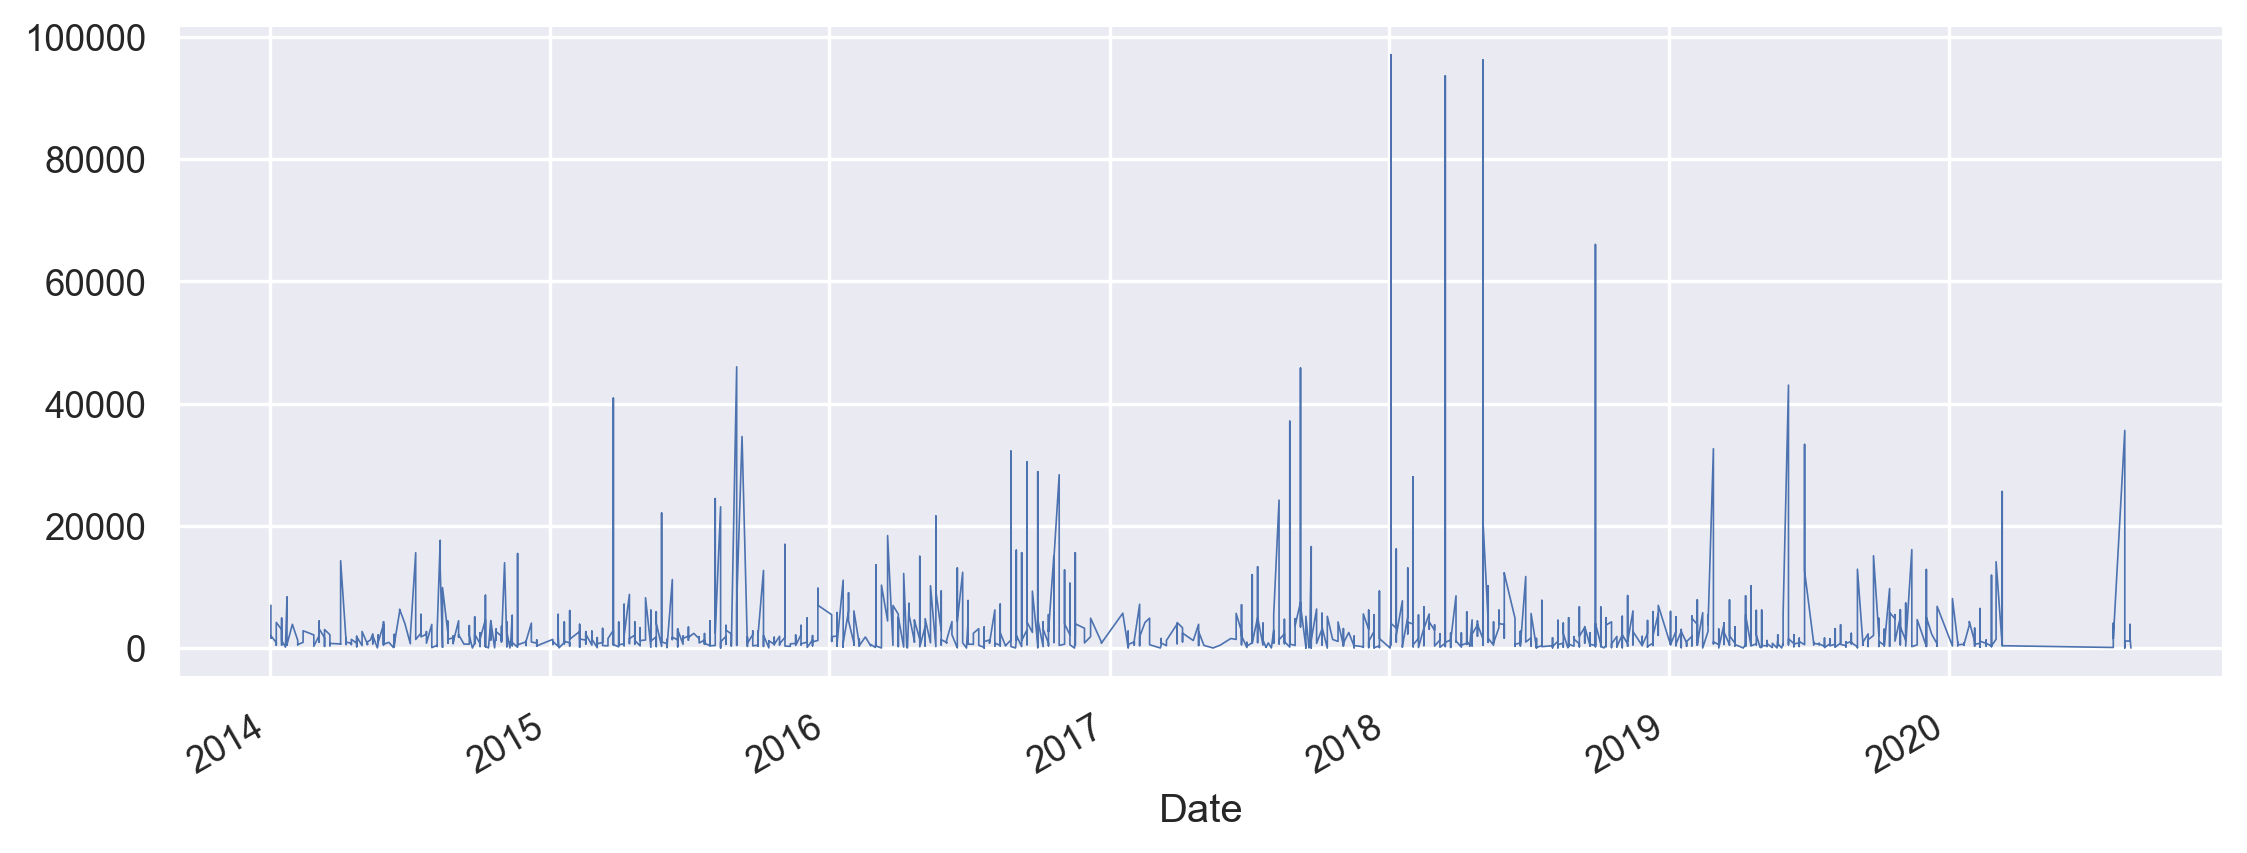

In [300]:
sns.set(rc={'figure.figsize':(11, 4)})
df_cons_motor['net_sales'].plot(linewidth=0.5);

In [301]:
df_cons_property = df_cons_new[df_cons_new['auction_title']=='Property']
df_cons_property

,auction_title,auction_id,net_sales,day,month,year
Date,,,,,,
2014-01-16,Property,79975,7372.97,16,1,2014
2014-02-10,Property,80454,19.25,10,2,2014
2014-02-05,Property,80168,17072.00,5,2,2014
2014-02-12,Property,80262,4874.25,12,2,2014
2014-03-06,Property,80948,35.42,6,3,2014
...,...,...,...,...,...,...
2019-03-13,Property,113526,79.31,13,3,2019
2019-03-13,Property,113527,103.95,13,3,2019
2019-11-19,Property,119359,3.85,19,11,2019


In [381]:
df_cons_property['year']

Date
2014-01-16    2014
2014-02-10    2014
2014-02-05    2014
2014-02-12    2014
2014-03-06    2014
              ... 
2019-03-13    2019
2019-03-13    2019
2019-11-19    2019
2020-01-16    2020
2020-08-03    2020
Name: year, Length: 88, dtype: int32

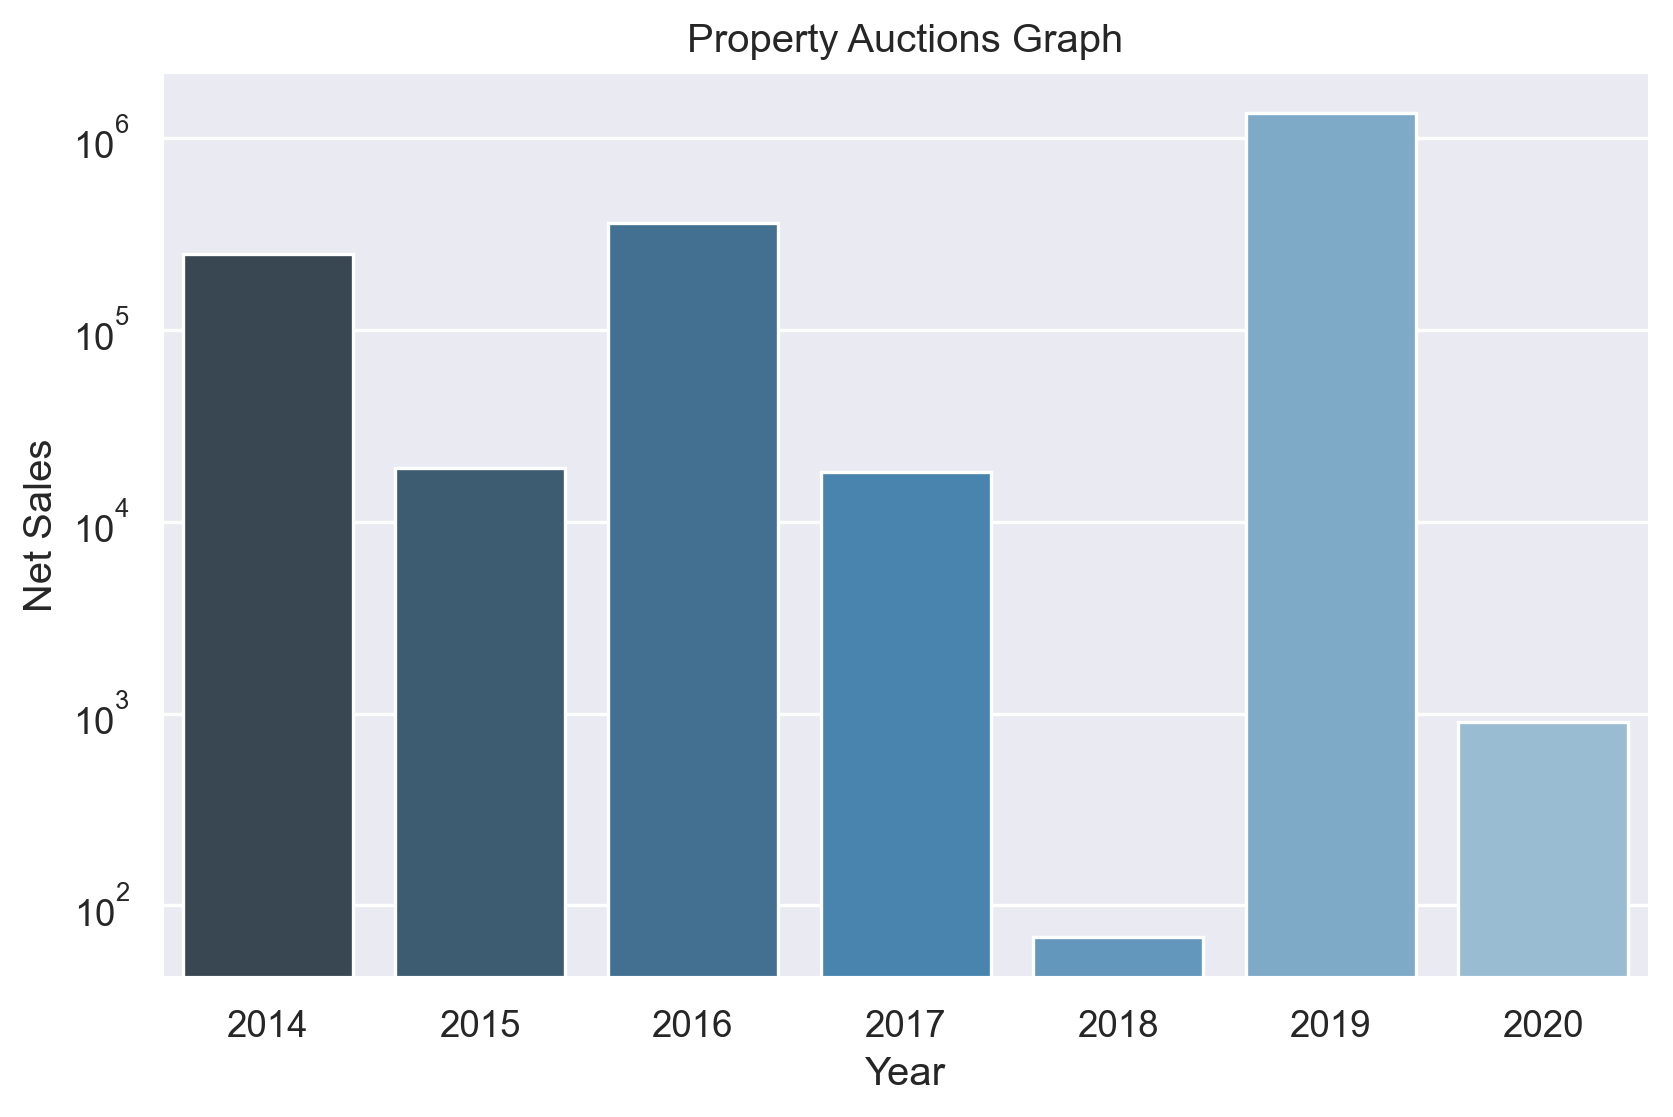

In [403]:
fig = plt.subplots(figsize=(8, 5))    
sns.set(style="darkgrid")    

x = df_cons_property['year']
y = df_cons_property['net_sales']

g = sns.barplot(x=x, y=y, data=df_cons_property, palette="Blues_d", ci=None);
g.set(xlabel="Year", ylabel = "Net Sales")

# There are two main reasons to use logarithmic scales in charts and graphs.
# The first is to respond to skewness towards large values; i.e., cases in
# which one or a few points are much larger than the bulk of the data 
# The second is to show percent change or multiplicative factors.
plt.title('Property Auctions Graph')
g.set_yscale("log")